## Imports, data load, metric function definition

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import BallTree
import time

In [119]:
#wind and atmospheric pressure are responsible for the surge
#-1 hPa--> +1cm


In [120]:
X_train = np.load('X_train_surge.npz')
Y_train = pd.read_csv('Y_train_surge.csv')
X_test = np.load('X_test_surge.npz')

In [121]:
slp = X_train['slp']
t_surge1_output = X_train['t_surge1_output']
t_surge2_output = X_train['t_surge2_output']
t_surge1_input = X_train['t_surge1_input']
t_surge2_input = X_train['t_surge2_input']
surge1_input = X_train['surge1_input']



In [136]:
t_surge1_input[-3]

array([1.2876192e+09, 1.2876660e+09, 1.2877056e+09, 1.2877524e+09,
       1.2877956e+09, 1.2878424e+09, 1.2878856e+09, 1.2879324e+09,
       1.2879720e+09, 1.2880188e+09], dtype=float32)

In [139]:
t_surge1_output[-3]

array([1.2880620e+09, 1.2881088e+09, 1.2881521e+09, 1.2881952e+09,
       1.2882420e+09, 1.2882852e+09, 1.2883284e+09, 1.2883752e+09,
       1.2884184e+09, 1.2884616e+09], dtype=float32)

In [118]:
surge1_input[2]

array([-0.22752637, -0.4018146 , -0.87440383, -0.63978505, -1.0755056 ,
       -1.712328  ,  0.58693594,  1.0695802 ,  0.7679275 , -0.1001619 ],
      dtype=float32)

In [41]:
X_train['surge1_input'][0]

array([-0.54593754,  0.13110517,  0.31880018,  0.19478741, -0.22752637,
       -0.4018146 , -0.87440383, -0.63978505, -1.0755056 , -1.712328  ],
      dtype=float32)

In [109]:
Y_train

,id_sequence,surge1_t0,surge1_t1,surge1_t2,surge1_t3,surge1_t4,surge1_t5,surge1_t6,surge1_t7,surge1_t8,...,surge2_t0,surge2_t1,surge2_t2,surge2_t3,surge2_t4,surge2_t5,surge2_t6,surge2_t7,surge2_t8,surge2_t9
0,1,0.586936,1.069580,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,...,-0.053886,0.356847,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057
1,2,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,...,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703
2,3,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,...,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733
3,4,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,...,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707
4,5,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,1.160076,0.442813,...,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707,-0.473001,-0.531677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,5595,1.451674,1.220407,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,...,0.759197,0.884931,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700
5595,5596,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,...,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223
5596,5597,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,...,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360
5597,5598,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,1.545521,1.166779,...,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360,2.620066,2.678742


In [100]:
slp = X_test['slp']
t_surge1_output = X_test['t_surge1_output']
t_surge2_output = X_test['t_surge2_output']
t_surge1_input = X_test['t_surge1_input']
t_surge2_input = X_test['t_surge2_input']

In [99]:
t_surge1_input[13]

array([-6.282468e+08, -6.282036e+08, -6.281604e+08, -6.281172e+08,
       -6.280668e+08, -6.280272e+08, -6.279804e+08, -6.279372e+08,
       -6.278940e+08, -6.278472e+08], dtype=float32)

In [103]:
(t_surge1_output[19][0]-t_surge1_input[19][9])/(3600*24)

0.5

In [73]:
t_surge1_output[10]

array([-6.003936e+08, -6.003468e+08, -6.003036e+08, -6.002568e+08,
       -6.002136e+08, -6.001704e+08, -6.001272e+08, -6.000804e+08,
       -6.000372e+08, -5.999940e+08], dtype=float32)

In [21]:
slp = X_train['slp']

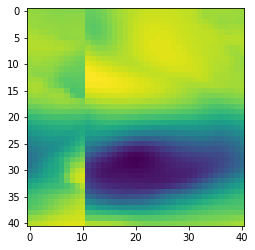

In [30]:
plt.imshow(slp[0][30])

In [36]:
w = np.linspace(1, 0.1, 10)[np.newaxis]

In [37]:
w

array([[1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]])

In [4]:
surge_train = np.array(Y_train)[:,1:]

In [5]:
def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

## Benchmark
Train using kNN of pressure fields at two instants in time, with 40 neighbours

In [6]:
nfields = 2; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5559):
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [7]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509):
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [8]:
tree = BallTree(slp_train)

In [9]:
surge_test_benchmark = []; k = 40
for i in range(509):
    dist, ind = tree.query([slp_test[i]], k=k)
    surge_test_benchmark.append(np.mean(surge_train[ind[0]], axis=0))
surge_test_benchmark = np.array(surge_test_benchmark)

In [10]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')